In [ ]:
import pandas as pd

# Carregar o ficheiro CSV
df = pd.read_csv('C:/Users/roger/OneDrive/Ambiente de Trabalho/MEGSI/AASE/archive/apartments_for_rent_classified_100K/apartments_for_rent_classified_100K.csv', encoding='ISO-8859-1', sep=';')



# Visualizar as primeiras linhas do dataframe
df.head()

,id,category,title,body,amenities,bathrooms,bedrooms,currency,fee,has_photo,pets_allowed,price,price_display,price_type,square_feet,address,cityname,state,latitude,longitude,source,time
0,5668640009,housing/rent/apartment,One BR 507 & 509 Esplanade,"This unit is located at 507 & 509 Esplanade, R...",NaN,1.0,1.0,USD,No,Thumbnail,Cats,2195.0,"$2,195",Monthly,542,507 509 Esplanade,Redondo Beach,CA,33.8520,-118.3759,RentLingo,1577360355
1,5668639818,housing/rent/apartment,Three BR 146 Lochview Drive,"This unit is located at 146 Lochview Drive, Ne...",NaN,1.5,3.0,USD,No,Thumbnail,"Cats,Dogs",1250.0,"$1,250",Monthly,1500,146 Lochview Dr,Newport News,VA,37.0867,-76.4941,RentLingo,1577360340
2,5668639686,housing/rent/apartment,Three BR 3101 Morningside Drive,This unit is located at 3101 Morningside Drive...,NaN,2.0,3.0,USD,No,Thumbnail,NaN,1395.0,"$1,395",Monthly,1650,3101 Morningside Dr,Raleigh,NC,35.8230,-78.6438,RentLingo,1577360332
3,5668639659,housing/rent/apartment,Two BR 209 Aegean Way,"This unit is located at 209 Aegean Way, Vacavi...",NaN,1.0,2.0,USD,No,Thumbnail,"Cats,Dogs",1600.0,"$1,600",Monthly,820,209 Aegean Way,Vacaville,CA,38.3622,-121.9712,RentLingo,1577360330
4,5668639374,housing/rent/apartment,One BR 4805 Marquette NE,"This unit is located at 4805 Marquette NE, Alb...",NaN,1.0,1.0,USD,No,Thumbnail,"Cats,Dogs",975.0,$975,Monthly,624,4805 Marquette NE,Albuquerque,NM,35.1038,-106.6110,RentLingo,1577360308


In [197]:
# Contar valores nulos na coluna 'id'
nulos_id = df['id'].isnull().sum()

# Contar valores em branco na coluna 'id' (apenas se for do tipo string)
if df['id'].dtype == 'object':
    brancos_id = (df['id'].str.strip() == '').sum()
else:
    brancos_id = 0

# Contar valores duplicados na coluna 'id'
duplicados_id = df['id'].duplicated().sum()

# Exibir os resultados
print("Valores nulos na coluna 'id':", nulos_id)
print("Valores em branco na coluna 'id':", brancos_id)
print("Valores duplicados na coluna 'id':", duplicados_id)


Valores nulos na coluna 'id': 0
Valores em branco na coluna 'id': 0
Valores duplicados na coluna 'id': 84


In [200]:
# Contar a quantidade inicial de linhas
quantidade_inicial = len(df)

# Eliminar duplicados com base na coluna 'id'
df = df.drop_duplicates(subset='id')

# Contar a quantidade de linhas apos a eliminacao de duplicados
quantidade_final = len(df)

# Exibir os resultados
print("Quantidade inicial de linhas:", quantidade_inicial)
print("Quantidade de linhas apos a eliminacao de duplicados:", quantidade_final)


Quantidade inicial de linhas: 99492
Quantidade de linhas após a eliminação de duplicados: 99408


In [202]:
# Verificar a quantidade total de linhas e a quantidade de valores unicos na coluna 'id'
total_linhas = len(df)
valores_unicos_id = df['id'].nunique()

# Exibir os resultados
print("Total de linhas no DataFrame:", total_linhas)
print("Valores unicos na coluna 'id':", valores_unicos_id)

# Verificar se ha duplicados na coluna 'id'
if total_linhas == valores_unicos_id:
    print("Nao existem duplicados na coluna 'id'.")
else:
    print("Existem duplicados na coluna 'id'.")

Total de linhas no DataFrame: 99408
Valores únicos na coluna 'id': 99408
Não existem duplicados na coluna 'id'.


In [204]:
# Contar valores nulos na coluna 'category'
nulos_category = df['category'].isnull().sum()

# Contar valores em branco na coluna 'category' (apenas se for do tipo string)
if df['category'].dtype == 'object':
    brancos_category = (df['category'].str.strip() == '').sum()
else:
    brancos_category = 0

# Contar valores duplicados na coluna 'category'
duplicados_category = df['category'].duplicated().sum()

# Exibir os resultados
print("Valores nulos na coluna 'category':", nulos_category)
print("Valores em branco na coluna 'category':", brancos_category)
print("Valores duplicados na coluna 'category':", duplicados_category)

Valores nulos na coluna 'category': 0
Valores em branco na coluna 'category': 0
Valores duplicados na coluna 'category': 99401


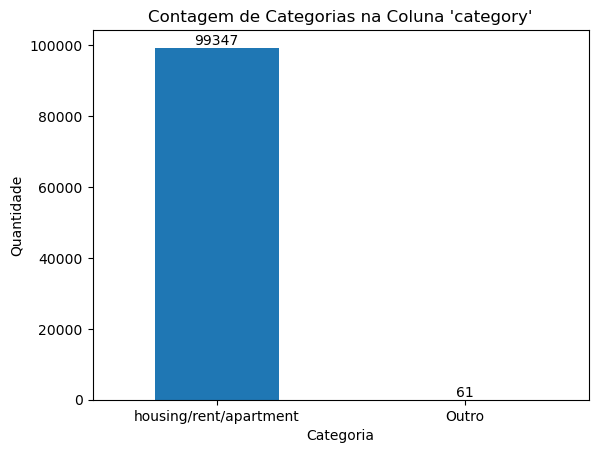

In [206]:
import pandas as pd
import matplotlib.pyplot as plt



# Substituir valores diferentes de 'housing/rent/apartment' por 'Outro'
df['category'] = df['category'].apply(lambda x: x if x == 'housing/rent/apartment' else 'Outro')

# Contar a quantidade de cada categoria
contagem = df['category'].value_counts()

# Criar o grafico de barras
fig, ax = plt.subplots()
barras = contagem.plot(kind='bar', color=['#1f77b4', '#ff7f0e'], ax=ax)

# Adicionar valores em cima de cada barra
for p in barras.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

# Personalizar o grafico
plt.title("Contagem de Categorias na Coluna 'category'")
plt.xlabel("Categoria")
plt.ylabel("Quantidade")
plt.xticks(rotation=0)
plt.show()

In [209]:
import pandas as pd

# Verificar valores nulos na coluna 'has_photo'
nulos_has_photo = df['has_photo'].isnull().sum()

# Verificar valores brancos na coluna 'has_photo' (apenas se for do tipo string)
if df['has_photo'].dtype == 'object':
    brancos_has_photo = (df['has_photo'].str.strip() == '').sum()
else:
    brancos_has_photo = 0

# Contar a quantidade de linhas totais
total_linhas = len(df)

# Identificar valores que nao sejam "Yes", "No" ou "Thumbnail"
valores_invalidos = df[~df['has_photo'].isin(['Yes', 'No', 'Thumbnail'])]['has_photo'].value_counts()

# Exibir os resultados
print("Valores nulos na coluna 'has_photo':", nulos_has_photo)
print("Valores brancos na coluna 'has_photo':", brancos_has_photo)
print("Quantidade total de linhas:", total_linhas)
print("Valores que não são 'Yes', 'No' ou 'Thumbnail':")
print(valores_invalidos)


Valores nulos na coluna 'has_photo': 0
Valores brancos na coluna 'has_photo': 0
Quantidade total de linhas: 99408
Valores que não são 'Yes', 'No' ou 'Thumbnail':
Series([], Name: count, dtype: int64)


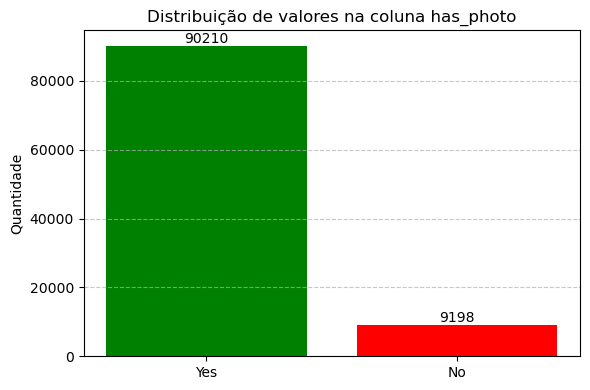

               id                category  \
0      5668640009  housing/rent/apartment   
1      5668639818  housing/rent/apartment   
2      5668639686  housing/rent/apartment   
3      5668639659  housing/rent/apartment   
4      5668639374  housing/rent/apartment   
...           ...                     ...   
99487  5121219946  housing/rent/apartment   
99488  5121219696  housing/rent/apartment   
99489  5121219420  housing/rent/apartment   
99490  5121218935  housing/rent/apartment   
99491  5121218844  housing/rent/apartment   

                                                   title  \
0                             One BR 507 & 509 Esplanade   
1                            Three BR 146 Lochview Drive   
2                        Three BR 3101 Morningside Drive   
3                                  Two BR 209 Aegean Way   
4                               One BR 4805 Marquette NE   
...                                                  ...   
99487      Houston - superb Apartment n

In [211]:
import pandas as pd
import matplotlib.pyplot as plt



# Substituir os valores 'Thumbnail' por 'Yes'
df['has_photo'] = df['has_photo'].replace('Thumbnail', 'Yes')

# Contar os valores em cada categoria
counts = df['has_photo'].value_counts()

# Criar o gráfico de barras
plt.figure(figsize=(6, 4))
bars = plt.bar(counts.index, counts.values, color=['green', 'red'])

# Adicionar as quantidades em cima de cada barra
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, str(height), ha='center', va='bottom')

# Personalizar o gráfico
plt.title('Distribuicao de valores na coluna has_photo')
plt.ylabel('Quantidade')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Exibir o grafico
plt.tight_layout()
plt.show()

# Exibir o DataFrame atualizado
print(df)

In [213]:
# Verificar as colunas disponiveis no DataFrame
print(df.columns)


Index(['id', 'category', 'title', 'body', 'amenities', 'bathrooms', 'bedrooms',
       'currency', 'fee', 'has_photo', 'pets_allowed', 'price',
       'price_display', 'price_type', 'square_feet', 'address', 'cityname',
       'state', 'latitude', 'longitude', 'source', 'time'],
      dtype='object')


In [215]:
import pandas as pd

# Eliminar valores nulos nas colunas 'bathrooms' e 'bedrooms'
df = df.dropna(subset=['bathrooms', 'bedrooms'])

# Eliminar os outliers da coluna 'price' (caso ainda nao tenha feito)
q1_price = df['price'].quantile(0.25)
q3_price = df['price'].quantile(0.75)
iqr_price = q3_price - q1_price
limite_inferior_price = q1_price - 1.5 * iqr_price
limite_superior_price = q3_price + 1.5 * iqr_price
df = df[(df['price'] >= limite_inferior_price) & (df['price'] <= limite_superior_price)]

# Eliminar os outliers da coluna 'square_feet'
q1_square_feet = df['square_feet'].quantile(0.25)
q3_square_feet = df['square_feet'].quantile(0.75)
iqr_square_feet = q3_square_feet - q1_square_feet
limite_inferior_square_feet = q1_square_feet - 1.5 * iqr_square_feet
limite_superior_square_feet = q3_square_feet + 1.5 * iqr_square_feet
df = df[(df['square_feet'] >= limite_inferior_square_feet) & (df['square_feet'] <= limite_superior_square_feet)]

# Eliminar os outliers da coluna 'bathrooms'
q1_bathrooms = df['bathrooms'].quantile(0.25)
q3_bathrooms = df['bathrooms'].quantile(0.75)
iqr_bathrooms = q3_bathrooms - q1_bathrooms
limite_inferior_bathrooms = q1_bathrooms - 1.5 * iqr_bathrooms
limite_superior_bathrooms = q3_bathrooms + 1.5 * iqr_bathrooms
df = df[(df['bathrooms'] >= limite_inferior_bathrooms) & (df['bathrooms'] <= limite_superior_bathrooms)]

# Eliminar os outliers da coluna 'bedrooms'
q1_bedrooms = df['bedrooms'].quantile(0.25)
q3_bedrooms = df['bedrooms'].quantile(0.75)
iqr_bedrooms = q3_bedrooms - q1_bedrooms
limite_inferior_bedrooms = q1_bedrooms - 1.5 * iqr_bedrooms
limite_superior_bedrooms = q3_bedrooms + 1.5 * iqr_bedrooms
df = df[(df['bedrooms'] >= limite_inferior_bedrooms) & (df['bedrooms'] <= limite_superior_bedrooms)]

# Exibir o numero de linhas antes e depois de remover os outliers
print(f"Número de linhas antes de remover os outliers: {len(df)}")

# Exibir o DataFrame apos a remocao dos outliers
print(df)


Número de linhas antes de remover os outliers: 91821
               id                category  \
0      5668640009  housing/rent/apartment   
1      5668639818  housing/rent/apartment   
2      5668639686  housing/rent/apartment   
3      5668639659  housing/rent/apartment   
4      5668639374  housing/rent/apartment   
...           ...                     ...   
99487  5121219946  housing/rent/apartment   
99488  5121219696  housing/rent/apartment   
99489  5121219420  housing/rent/apartment   
99490  5121218935  housing/rent/apartment   
99491  5121218844  housing/rent/apartment   

                                                   title  \
0                             One BR 507 & 509 Esplanade   
1                            Three BR 146 Lochview Drive   
2                        Three BR 3101 Morningside Drive   
3                                  Two BR 209 Aegean Way   
4                               One BR 4805 Marquette NE   
...                                           

In [217]:
# Numero de linhas apos a remocao dos outliers nas colunas 'price', 'square_feet', 'bathrooms', 'bedrooms'
linhas_antes_nulos = len(df)

# Eliminar as linhas onde 'cityname', 'state' ou 'source' sao nulas
df = df.dropna(subset=['cityname', 'state', 'source'])

# Exibir a quantidade de linhas antes e depois da remocao das linhas nulas
print(f"Numero de linhas antes de remover as linhas nulas nas colunas 'cityname', 'state' e 'source': {linhas_antes_nulos}")
print(f"Numero de linhas apos remover as linhas nulas: {len(df)}")


Número de linhas antes de remover as linhas nulas nas colunas 'cityname', 'state' e 'source': 91821
Número de linhas após remover as linhas nulas: 91604


In [219]:
# Visualizar as primeiras dez linhas da coluna 'source'
print(df['source'].head(10))


0    RentLingo
1    RentLingo
2    RentLingo
3    RentLingo
4    RentLingo
5    RentLingo
6    RentLingo
7    RentLingo
8    RentLingo
9    RentLingo
Name: source, dtype: object


In [221]:
# Eliminar as linhas nulas nas colunas 'latitude' e 'longitude'
df = df.dropna(subset=['latitude', 'longitude'])

# Exibir o numero de linhas apos a eliminacao
print(f"Numero de linhas apos eliminar nulos nas colunas 'latitude' e 'longitude': {len(df)}")


Número de linhas após eliminar nulos nas colunas 'latitude' e 'longitude': 91604


In [223]:
# Filtrar apenas as linhas onde 'price_type' é igual a 'Monthly'
df = df[df['price_type'] == 'Monthly']

# Exibir o numero de linhas restantes
print(f"Numero de linhas apos manter apenas 'Monthly' na coluna 'price_type': {len(df)}")


Número de linhas após manter apenas 'Monthly' na coluna 'price_type': 91603


In [225]:
# Substituir valores nulos por 'Desconhecido' na coluna 'pets_allowed'
df['pets_allowed'] = df['pets_allowed'].fillna('Desconhecido')

# Verificar os resultados
print(df['pets_allowed'].value_counts())


pets_allowed
Desconhecido      55066
Cats,Dogs         34743
Cats               1732
Dogs                 61
Cats,Dogs,None        1
Name: count, dtype: int64


In [227]:
# Substituir valores nulos na coluna 'amenities' por 'Nao'
df['amenities'] = df['amenities'].fillna('Nao')

# Verificar as alteracoes
print(df['amenities'].head(20))


0                                                Não
1                                                Não
2                                                Não
3                                                Não
4                                                Não
5                                                Não
6                                                Não
7                                                Não
8                                                Não
9                                                Não
10                                               Não
12                                               Não
14                                               Não
15                                               Não
16                                               Não
17                                               Não
18                                               Não
19                                               Não
20                                            

In [229]:
# Substituir os valores restantes na coluna 'amenities' por 'Sim'
df['amenities'] = df['amenities'].apply(lambda x: 'Sim' if x != 'Nao' else x)

# Verificar as alteracoes
print(df['amenities'].head(30))


0     Não
1     Não
2     Não
3     Não
4     Não
5     Não
6     Não
7     Não
8     Não
9     Não
10    Não
12    Não
14    Não
15    Não
16    Não
17    Não
18    Não
19    Não
20    Não
21    Sim
22    Sim
23    Sim
24    Sim
25    Sim
26    Sim
27    Sim
29    Sim
30    Não
31    Não
32    Sim
Name: amenities, dtype: object


In [231]:
df.head()

,id,category,title,body,amenities,bathrooms,bedrooms,currency,fee,has_photo,pets_allowed,price,price_display,price_type,square_feet,address,cityname,state,latitude,longitude,source,time
0,5668640009,housing/rent/apartment,One BR 507 & 509 Esplanade,"This unit is located at 507 & 509 Esplanade, R...",Não,1.0,1.0,USD,No,Yes,Cats,2195.0,"$2,195",Monthly,542,507 509 Esplanade,Redondo Beach,CA,33.8520,-118.3759,RentLingo,1577360355
1,5668639818,housing/rent/apartment,Three BR 146 Lochview Drive,"This unit is located at 146 Lochview Drive, Ne...",Não,1.5,3.0,USD,No,Yes,"Cats,Dogs",1250.0,"$1,250",Monthly,1500,146 Lochview Dr,Newport News,VA,37.0867,-76.4941,RentLingo,1577360340
2,5668639686,housing/rent/apartment,Three BR 3101 Morningside Drive,This unit is located at 3101 Morningside Drive...,Não,2.0,3.0,USD,No,Yes,Desconhecido,1395.0,"$1,395",Monthly,1650,3101 Morningside Dr,Raleigh,NC,35.8230,-78.6438,RentLingo,1577360332
3,5668639659,housing/rent/apartment,Two BR 209 Aegean Way,"This unit is located at 209 Aegean Way, Vacavi...",Não,1.0,2.0,USD,No,Yes,"Cats,Dogs",1600.0,"$1,600",Monthly,820,209 Aegean Way,Vacaville,CA,38.3622,-121.9712,RentLingo,1577360330
4,5668639374,housing/rent/apartment,One BR 4805 Marquette NE,"This unit is located at 4805 Marquette NE, Alb...",Não,1.0,1.0,USD,No,Yes,"Cats,Dogs",975.0,$975,Monthly,624,4805 Marquette NE,Albuquerque,NM,35.1038,-106.6110,RentLingo,1577360308


In [233]:
# Exibir as primeiras 30 linhas de todas as colunas sem truncamento
pd.set_option('display.max_columns', None)  # Exibe todas as colunas
print(df.head(30))


            id                category  \
0   5668640009  housing/rent/apartment   
1   5668639818  housing/rent/apartment   
2   5668639686  housing/rent/apartment   
3   5668639659  housing/rent/apartment   
4   5668639374  housing/rent/apartment   
5   5668639368  housing/rent/apartment   
6   5668638765  housing/rent/apartment   
7   5668638578  housing/rent/apartment   
8   5668638476  housing/rent/apartment   
9   5668638122  housing/rent/apartment   
10  5668638015  housing/rent/apartment   
12  5668637809  housing/rent/apartment   
14  5668637528  housing/rent/apartment   
15  5668636381  housing/rent/apartment   
16  5668636291  housing/rent/apartment   
17  5668635018  housing/rent/apartment   
18  5668634255  housing/rent/apartment   
19  5668633909  housing/rent/apartment   
20  5668632975  housing/rent/apartment   
21  5668632369  housing/rent/apartment   
22  5668632002  housing/rent/apartment   
23  5668631854  housing/rent/apartment   
24  5668631790  housing/rent/apart

In [235]:
# Exibir o número total de linhas no DataFrame
print(len(df))


91603


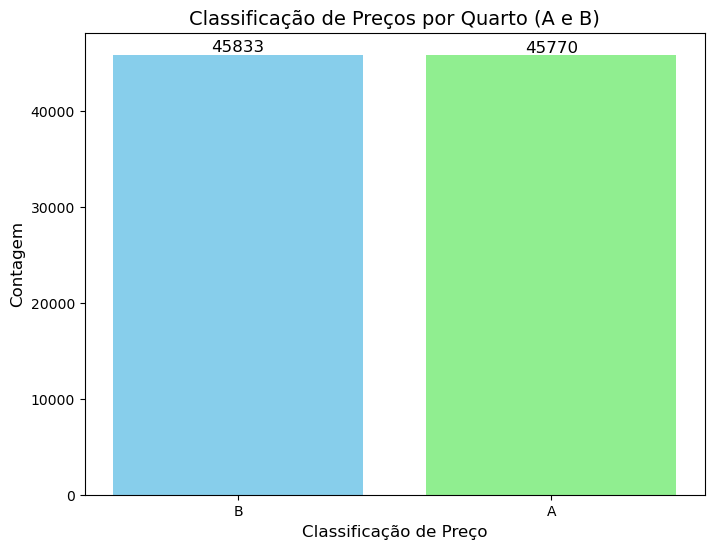

In [237]:
import pandas as pd
import matplotlib.pyplot as plt

# Supondo que o DataFrame se chama df

# Calcular o preco por quarto
df['price_per_bedroom'] = df['price'] / df['bedrooms']

# Calcular a mediana do preco por quarto
median_price_per_bedroom = df['price_per_bedroom'].median()

# Classificar os precos como 'A' ou 'B' com base na mediana
df['price_class'] = df['price_per_bedroom'].apply(lambda x: 'A' if x < median_price_per_bedroom else 'B')

# Contar a frequencia de cada classe
price_class_counts = df['price_class'].value_counts()

# Criar o grafico de barras
plt.figure(figsize=(8, 6))
bars = plt.bar(price_class_counts.index, price_class_counts.values, color=['skyblue', 'lightgreen'])

# Adicionar os valores em cima das barras
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() - 0.5, 
             str(int(bar.get_height())), ha='center', va='bottom', fontsize=12, color='black')

# Adicionar titulo e rotulos
plt.title('Classificacao de Precos por Quarto (A e B)', fontsize=14)
plt.xlabel('Classificacao de Preco', fontsize=12)
plt.ylabel('Contagem', fontsize=12)

# Exibir o grafico
plt.show()


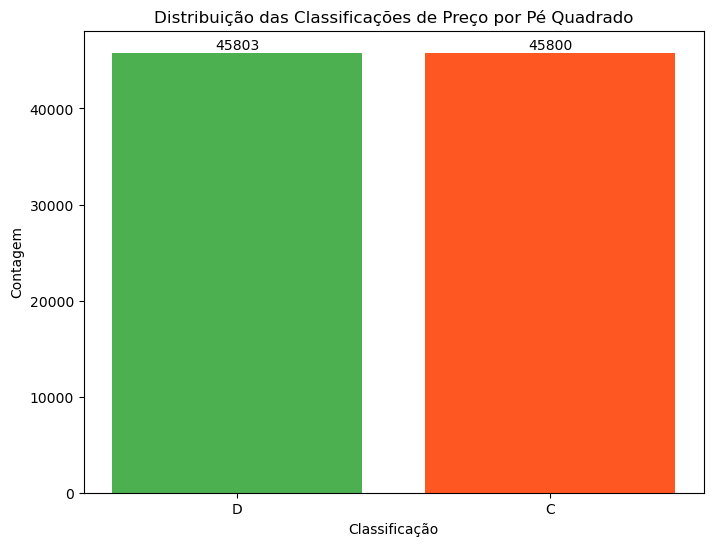

In [239]:
# Calcular o preco por pe quadrado
df['price_per_square_feet'] = df['price'] / df['square_feet']

# Calcular a mediana do preco por pe quadrado
mediana_price_per_square_feet = df['price_per_square_feet'].median()

# Classificar os precos por pe quadrado em 'C' (abaixo da mediana) e 'D' (acima da mediana)
df['classification'] = df['price_per_square_feet'].apply(lambda x: 'C' if x < mediana_price_per_square_feet else 'D')

# Visualizar a contagem de cada classificacao num grafico de barras
import matplotlib.pyplot as plt

contagem_classificacao = df['classification'].value_counts()

plt.figure(figsize=(8, 6))
barras = plt.bar(contagem_classificacao.index, contagem_classificacao.values, color=['#4CAF50', '#FF5722'])
plt.xlabel('Classificacao')
plt.ylabel('Contagem')
plt.title('Distribuicao das Classificacoes de Preco por Pe Quadrado')

# Adicionar valores no topo de cada barra
for barra in barras:
    yval = barra.get_height()
    plt.text(barra.get_x() + barra.get_width() / 2, yval, int(yval), ha='center', va='bottom')

plt.show()


In [241]:
df.head()

,id,category,title,body,amenities,bathrooms,bedrooms,currency,fee,has_photo,pets_allowed,price,price_display,price_type,square_feet,address,cityname,state,latitude,longitude,source,time,price_per_bedroom,price_class,price_per_square_feet,classification
0,5668640009,housing/rent/apartment,One BR 507 & 509 Esplanade,"This unit is located at 507 & 509 Esplanade, R...",Não,1.0,1.0,USD,No,Yes,Cats,2195.0,"$2,195",Monthly,542,507 509 Esplanade,Redondo Beach,CA,33.8520,-118.3759,RentLingo,1577360355,2195.000000,B,4.049815,D
1,5668639818,housing/rent/apartment,Three BR 146 Lochview Drive,"This unit is located at 146 Lochview Drive, Ne...",Não,1.5,3.0,USD,No,Yes,"Cats,Dogs",1250.0,"$1,250",Monthly,1500,146 Lochview Dr,Newport News,VA,37.0867,-76.4941,RentLingo,1577360340,416.666667,A,0.833333,C
2,5668639686,housing/rent/apartment,Three BR 3101 Morningside Drive,This unit is located at 3101 Morningside Drive...,Não,2.0,3.0,USD,No,Yes,Desconhecido,1395.0,"$1,395",Monthly,1650,3101 Morningside Dr,Raleigh,NC,35.8230,-78.6438,RentLingo,1577360332,465.000000,A,0.845455,C
3,5668639659,housing/rent/apartment,Two BR 209 Aegean Way,"This unit is located at 209 Aegean Way, Vacavi...",Não,1.0,2.0,USD,No,Yes,"Cats,Dogs",1600.0,"$1,600",Monthly,820,209 Aegean Way,Vacaville,CA,38.3622,-121.9712,RentLingo,1577360330,800.000000,A,1.951220,D
4,5668639374,housing/rent/apartment,One BR 4805 Marquette NE,"This unit is located at 4805 Marquette NE, Alb...",Não,1.0,1.0,USD,No,Yes,"Cats,Dogs",975.0,$975,Monthly,624,4805 Marquette NE,Albuquerque,NM,35.1038,-106.6110,RentLingo,1577360308,975.000000,B,1.562500,D


In [243]:
# Normalizar os valores e aplicar a transformacao
def map_pets(value):
    value = str(value).strip().lower()  # Remove espacos extras e converte para minusculas
    # Se for 'Desconhecido', retornar 0, caso contrario, retornar 1
    if value == 'desconhecido':
        return 0
    else:
        return 1

# Aplicar a funcao a coluna 'pets_allowed'
df['pets_allowed'] = df['pets_allowed'].apply(map_pets)

# Verificar os resultados
print("Contagem de valores após transformacao:")
print(df['pets_allowed'].value_counts())

# Exibir as primeiras linhas para garantir que a transformacao foi aplicada corretamente
print(df.head(10))

contagem_valores = df['pets_allowed'].value_counts()
print(contagem_valores)


Contagem de valores após transformação:
pets_allowed
0    55066
1    36537
Name: count, dtype: int64
           id                category                                 title  \
0  5668640009  housing/rent/apartment            One BR 507 & 509 Esplanade   
1  5668639818  housing/rent/apartment           Three BR 146 Lochview Drive   
2  5668639686  housing/rent/apartment       Three BR 3101 Morningside Drive   
3  5668639659  housing/rent/apartment                 Two BR 209 Aegean Way   
4  5668639374  housing/rent/apartment              One BR 4805 Marquette NE   
5  5668639368  housing/rent/apartment                 Two BR 7801 Marble NE   
6  5668638765  housing/rent/apartment  Two BR 5 Salt Marsh Quay Apartment H   
7  5668638578  housing/rent/apartment             Two BR 11280 W. 20th Ave.   
8  5668638476  housing/rent/apartment              Two BR 1427 Lewis Street   
9  5668638122  housing/rent/apartment            Two BR 10201 Remmet Avenue   

                             

In [245]:
contagem_valores = df['amenities'].value_counts()
print(contagem_valores)

amenities
Sim    77674
Não    13929
Name: count, dtype: int64


In [247]:
# Funcao para mapear os valores da coluna 'amenities'
def map_amenities(value):
    value = str(value).strip().lower()  # Remove espacos extras e converte para minusculas
    if value == 'sim':
        return 1
    else:
        return 0

# Aplicar a funcao a coluna 'amenities'
df['amenities'] = df['amenities'].apply(map_amenities)

# Verificar os resultados
print("Contagem de valores apos transformacao para 'amenities':")
print(df['amenities'].value_counts())

# Exibir as primeiras linhas para garantir que a transformacao foi aplicada corretamente
print(df.head(10))


Contagem de valores após transformação para 'amenities':
amenities
1    77674
0    13929
Name: count, dtype: int64
           id                category                                 title  \
0  5668640009  housing/rent/apartment            One BR 507 & 509 Esplanade   
1  5668639818  housing/rent/apartment           Three BR 146 Lochview Drive   
2  5668639686  housing/rent/apartment       Three BR 3101 Morningside Drive   
3  5668639659  housing/rent/apartment                 Two BR 209 Aegean Way   
4  5668639374  housing/rent/apartment              One BR 4805 Marquette NE   
5  5668639368  housing/rent/apartment                 Two BR 7801 Marble NE   
6  5668638765  housing/rent/apartment  Two BR 5 Salt Marsh Quay Apartment H   
7  5668638578  housing/rent/apartment             Two BR 11280 W. 20th Ave.   
8  5668638476  housing/rent/apartment              Two BR 1427 Lewis Street   
9  5668638122  housing/rent/apartment            Two BR 10201 Remmet Avenue   

               

In [249]:
# Funcao para mapear os valores da coluna 'has_photo'
def map_has_photo(value):
    value = str(value).strip().lower()  # Remove espacos extras e converte para minusculas
    if value == 'yes':  # Verificar 'yes'
        return 1
    else:
        return 0

# Aplicar a funcao à coluna 'has_photo'
df['has_photo'] = df['has_photo'].apply(map_has_photo)

# Verificar os resultados
print("Contagem de valores apos transformacao para 'has_photo':")
print(df['has_photo'].value_counts())

# Exibir as primeiras linhas para garantir que a transformacao foi aplicada corretamente
print(df.head(10))



Contagem de valores após transformação para 'has_photo':
has_photo
1    83278
0     8325
Name: count, dtype: int64
           id                category                                 title  \
0  5668640009  housing/rent/apartment            One BR 507 & 509 Esplanade   
1  5668639818  housing/rent/apartment           Three BR 146 Lochview Drive   
2  5668639686  housing/rent/apartment       Three BR 3101 Morningside Drive   
3  5668639659  housing/rent/apartment                 Two BR 209 Aegean Way   
4  5668639374  housing/rent/apartment              One BR 4805 Marquette NE   
5  5668639368  housing/rent/apartment                 Two BR 7801 Marble NE   
6  5668638765  housing/rent/apartment  Two BR 5 Salt Marsh Quay Apartment H   
7  5668638578  housing/rent/apartment             Two BR 11280 W. 20th Ave.   
8  5668638476  housing/rent/apartment              Two BR 1427 Lewis Street   
9  5668638122  housing/rent/apartment            Two BR 10201 Remmet Avenue   

               

In [251]:
#!pip install pandas sklearn matplotlib

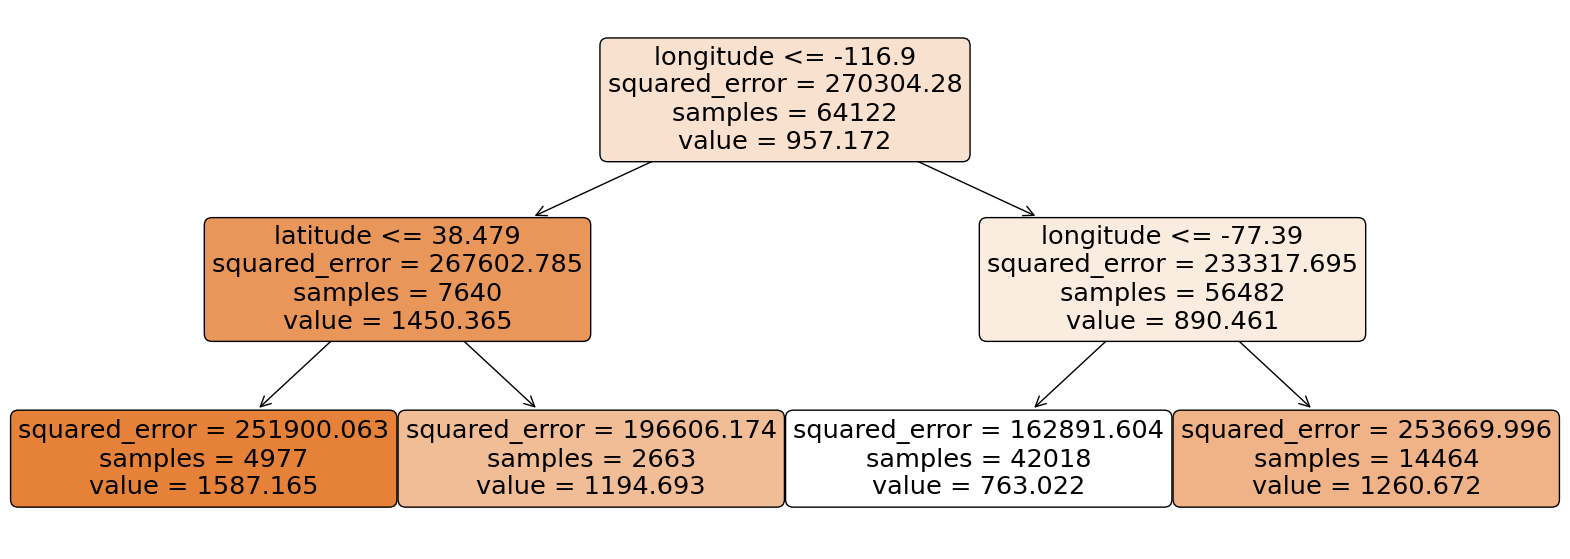

MAE: 348.93056777442035
NMAE: 13.923805577590597%


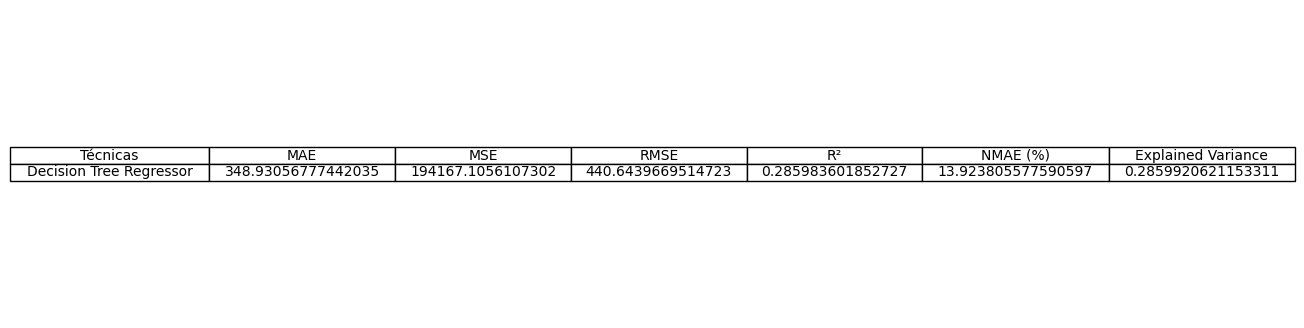

   bathrooms  bedrooms   price    regressao
0        1.0       1.0  2195.0  1587.165361
1        1.5       3.0  1250.0  1260.672290
2        2.0       3.0  1395.0   763.021776
3        1.0       2.0  1600.0  1587.165361
4        1.0       1.0   975.0   763.021776


In [273]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import LabelEncoder
from matplotlib import pyplot as plt

# Carregar o dataset (caso ainda não tenha sido carregado)
# df = pd.read_csv('caminho_para_o_teu_arquivo.csv')  # Descomenta e ajusta se necessário

# Definir X e y
X = df[['bathrooms', 'bedrooms', 'pets_allowed', 'amenities', 'square_feet' , 'latitude','longitude','has_photo']]  # Usar apenas as colunas 'bathrooms' e 'bedrooms'

# Converter 'price_class' para valores numéricos
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df['price'])  # Transformar 'price_class' em números

# Dividir os dados em treino e teste
Xtr, Xts, ytr, yts = train_test_split(X, y, test_size=0.3, random_state=42)

# Treinar o modelo
dt = DecisionTreeRegressor(max_depth=2, random_state=42)
dt.fit(Xtr, ytr)

# Plotar a árvore de decisão com a adição da classe
plt.figure(figsize=(20, 7))
plot_tree(dt, 
          feature_names=X.columns, 
          class_names=label_encoder.classes_,  # Usar as classes com os nomes das categorias
          filled=True,  # Colorir as folhas com base no valor da previsão
          rounded=True)  # Tornar os nós arredondados para melhor visualização
plt.show()

# Fazer previsões
prev = dt.predict(Xts)

# Calcular o MAE (erro médio absoluto)
mae = mean_absolute_error(yts, prev)
print(f"MAE: {mae}")

# Calcular o NMAE (erro médio absoluto normalizado)
nmae = (mae / (yts.max() - yts.min())) * 100
print(f"NMAE: {nmae}%")
# Importar as bibliotecas necessárias
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score
import pandas as pd
import matplotlib.pyplot as plt

# Fazer previsões (já existente no teu código)
prev = dt.predict(Xts)

# Calcular métricas para regressão
mae = mean_absolute_error(yts, prev)  # Erro Médio Absoluto
mse = mean_squared_error(yts, prev)  # Erro Quadrático Médio
rmse = mean_squared_error(yts, prev, squared=False)  # Raiz do Erro Quadrático Médio
r2 = r2_score(yts, prev)  # R² (Coeficiente de Determinação)
explained_var = explained_variance_score(yts, prev)  # Variância Explicada

# Calcular NMAE (Erro Médio Absoluto Normalizado)
nmae = (mae / (yts.max() - yts.min())) * 100

# Criar tabela com os resultados
data = {
    "Tecnicas": ["Decision Tree Regressor"],
    "MAE": [mae],
    "MSE": [mse],
    "RMSE": [rmse],
    "R²": [r2],
    "NMAE (%)": [nmae],
    "Explained Variance": [explained_var]
}

# Criar DataFrame para exibir os resultados
df_results = pd.DataFrame(data)

# Mostrar a tabela como gráfico
fig, ax = plt.subplots(figsize=(12, 4))  # Define o tamanho da tabela
ax.axis('off')  # Remove os eixos
table = ax.table(cellText=df_results.values, colLabels=df_results.columns, cellLoc='center', loc='center')

# Ajustar o estilo
table.auto_set_font_size(False)
table.set_fontsize(10)
table.auto_set_column_width(col=list(range(len(df_results.columns))))

# Exibir a tabela
plt.show()

# Adicionar a coluna 'regressao' ao DataFrame original com os resultados previstos
df['regressao'] = dt.predict(df[['bathrooms', 'bedrooms', 'pets_allowed', 'amenities', 'square_feet', 'latitude', 'longitude', 'has_photo']])

# Visualizar os primeiros registos do DataFrame atualizado
print(df[['bathrooms', 'bedrooms', 'price', 'regressao']].head())


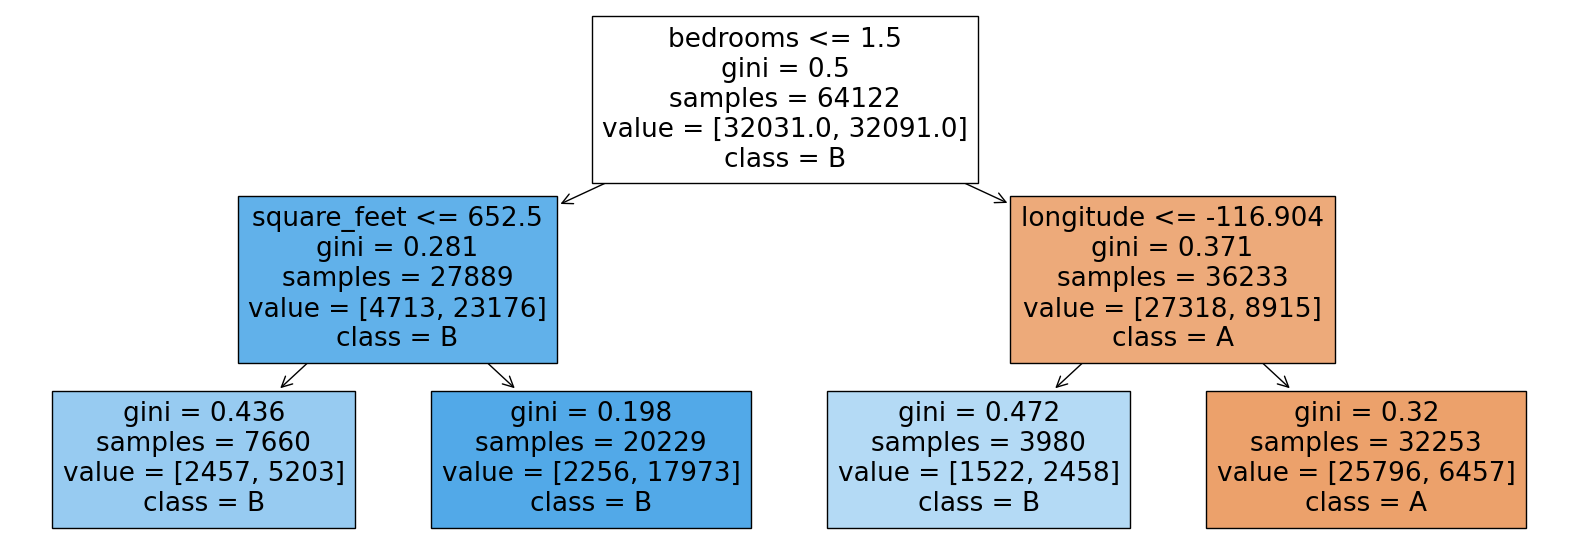

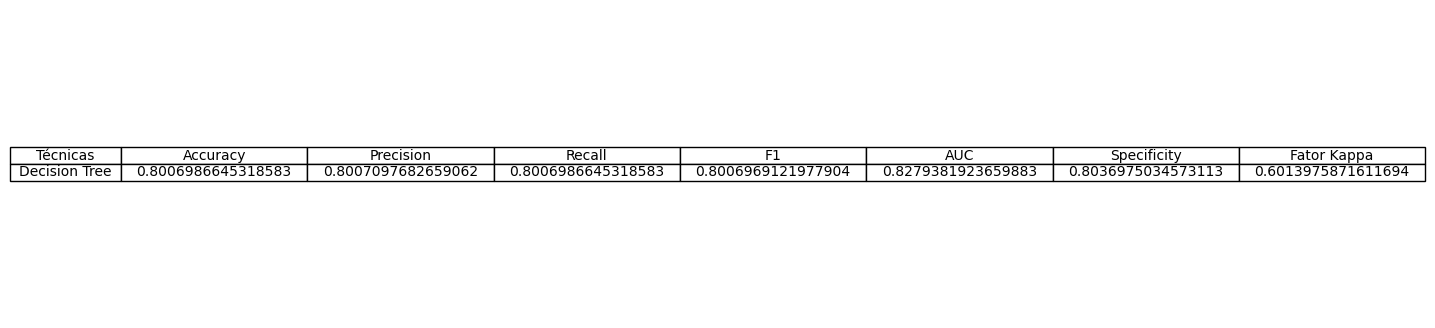

           id                category                            title  \
0  5668640009  housing/rent/apartment       One BR 507 & 509 Esplanade   
1  5668639818  housing/rent/apartment      Three BR 146 Lochview Drive   
2  5668639686  housing/rent/apartment  Three BR 3101 Morningside Drive   
3  5668639659  housing/rent/apartment            Two BR 209 Aegean Way   
4  5668639374  housing/rent/apartment         One BR 4805 Marquette NE   

                                                body  amenities  bathrooms  \
0  This unit is located at 507 & 509 Esplanade, R...          0        1.0   
1  This unit is located at 146 Lochview Drive, Ne...          0        1.5   
2  This unit is located at 3101 Morningside Drive...          0        2.0   
3  This unit is located at 209 Aegean Way, Vacavi...          0        1.0   
4  This unit is located at 4805 Marquette NE, Alb...          0        1.0   

   bedrooms currency fee  has_photo  pets_allowed   price price_display  \
0       1.0

In [275]:
# Importar bibliotecas necessárias
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    confusion_matrix,
    cohen_kappa_score,
)
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Definir as features (X) e o target (y)
X = df[['bedrooms', 'bathrooms', 'pets_allowed', 'amenities', 'latitude', 'longitude', 'square_feet', 'has_photo']]
y = df['price_class']

# Dividir os dados em treino e teste
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.3, random_state=42)

# Criar e treinar o modelo
dtree = tree.DecisionTreeClassifier(max_depth=2, random_state=42)
dtree.fit(X_treino, y_treino)

# Visualizar a árvore de decisão
plt.figure(figsize=(20, 7))
tree.plot_tree(
    dtree,
    feature_names=X.columns,
    class_names=['A', 'B'],
    filled=True
)
plt.show()

# Fazer previsões
pred = dtree.predict(X_teste)

# Calcular métricas
accuracy = accuracy_score(y_teste, pred)
precision = precision_score(y_teste, pred, average='weighted')
recall = recall_score(y_teste, pred, average='weighted')
f1 = f1_score(y_teste, pred, average='weighted')

# Calcular AUC (se possível)
try:
    y_proba = dtree.predict_proba(X_teste)
    auc = roc_auc_score(y_teste, y_proba, multi_class='ovr') if len(set(y_teste)) > 2 else roc_auc_score(y_teste, y_proba[:, 1])
except AttributeError:
    auc = None

# Specificity (apenas para problemas binários)
specificity = None
if len(set(y_teste)) == 2:
    tn, fp, fn, tp = confusion_matrix(y_teste, pred).ravel()
    specificity = tn / (tn + fp)

# Fator Kappa
kappa = cohen_kappa_score(y_teste, pred)

# Criar tabela com os resultados
data = {
    "Tecnicas": ["Decision Tree"],
    "Accuracy": [accuracy],
    "Precision": [precision],
    "Recall": [recall],
    "F1": [f1],
    "AUC": [auc],
    "Specificity": [specificity],
    "Fator Kappa": [kappa],
}

df_results = pd.DataFrame(data)

# Exibir a tabela como gráfico
fig, ax = plt.subplots(figsize=(12, 4))
ax.axis('off')
table = ax.table(cellText=df_results.values, colLabels=df_results.columns, cellLoc='center', loc='center')
table.auto_set_font_size(False)
table.set_fontsize(10)
table.auto_set_column_width(col=list(range(len(df_results.columns))))
plt.show()



# Adicionar a coluna 'classificacao' ao DataFrame original com os resultados previstos
df['classificacao'] = dtree.predict(df[['bedrooms', 'bathrooms', 'pets_allowed', 'amenities', 'latitude', 'longitude', 'square_feet', 'has_photo']])

# Visualizar os primeiros registos do DataFrame atualizado
print(df.head())



In [276]:
#!pip install pandas sklearn matplotlib seaborn
import warnings

warnings.filterwarnings("ignore")
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns
from sklearn.metrics import silhouette_score

COLORS = {
    0: "red",
    1: "blue",
    2: "black",
    3: "green",
    4: "orange",
    5: "gray",
    6: "pink",
}

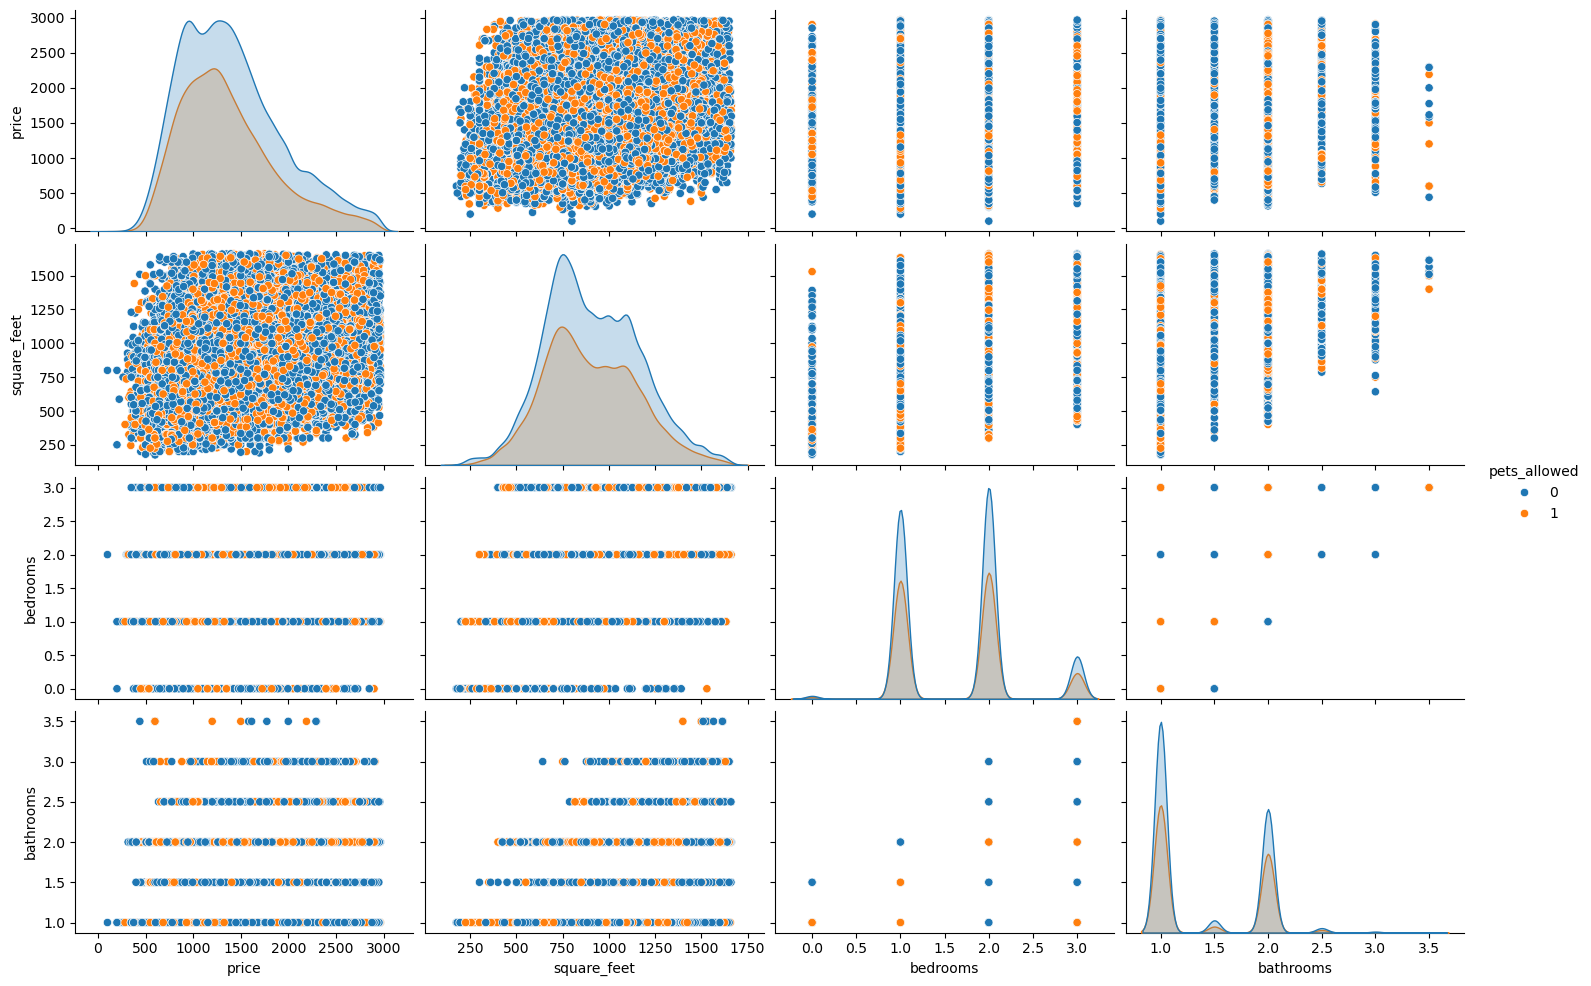

In [278]:
import seaborn as sns
import matplotlib.pyplot as plt

# Remove colunas irrelevantes para o parplot
df_filtered = df.drop(columns=["id", "title", "body", "address", "cityname", "state", "price_display", "classification"])

# Cria o pairplot
sns.pairplot(df_filtered, hue="pets_allowed", vars=["price", "square_feet", "bedrooms", "bathrooms"], aspect=1.5)

# Mostra o gráfico
plt.show()
plt.close()


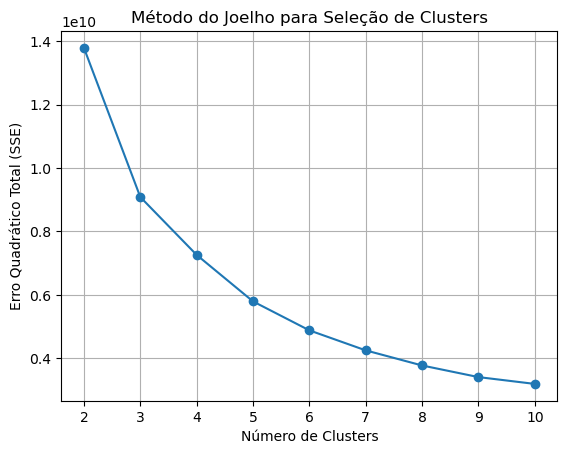

In [280]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Seleção de variáveis para clusterin
X = df[["price", "square_feet","bedrooms", "bathrooms","pets_allowed", "amenities","latitude","longitude", "has_photo"]]

# Lista para guardar o SSE
sse = []

# Testar número de clusters de 2 a 10
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=12345)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)

# Visualizar o método do joelho
plt.plot(range(2, 11), sse, marker="o")
plt.xticks(range(2, 11))
plt.xlabel("Numero de Clusters")
plt.ylabel("Erro Quadratico Total (SSE)")
plt.title("Metodo do Joelho para Selecao de Clusters")
plt.grid()
plt.show()
plt.close()


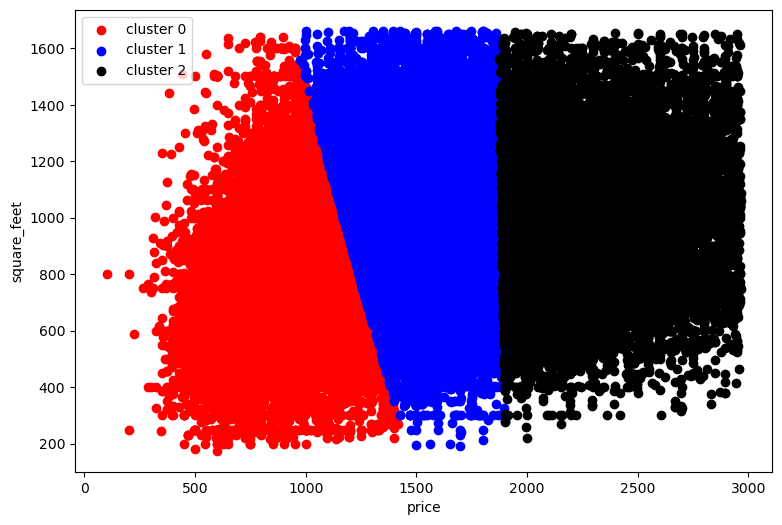

           id                category                            title  \
0  5668640009  housing/rent/apartment       One BR 507 & 509 Esplanade   
1  5668639818  housing/rent/apartment      Three BR 146 Lochview Drive   
2  5668639686  housing/rent/apartment  Three BR 3101 Morningside Drive   
3  5668639659  housing/rent/apartment            Two BR 209 Aegean Way   
4  5668639374  housing/rent/apartment         One BR 4805 Marquette NE   

                                                body  amenities  bathrooms  \
0  This unit is located at 507 & 509 Esplanade, R...          0        1.0   
1  This unit is located at 146 Lochview Drive, Ne...          0        1.5   
2  This unit is located at 3101 Morningside Drive...          0        2.0   
3  This unit is located at 209 Aegean Way, Vacavi...          0        1.0   
4  This unit is located at 4805 Marquette NE, Alb...          0        1.0   

   bedrooms currency fee  has_photo  pets_allowed   price price_display  \
0       1.0

In [281]:
kmeans = KMeans(n_clusters=3, random_state=12345)
clusters = kmeans.fit_predict(X)
X["cl"] = clusters
X.sort_values(by="cl", inplace=True)

clusters = X.cl.unique()


plt.figure(figsize=(9, 6))
for cluster in clusters:
    Xcluster = X.query(f"cl == {cluster}")
    plt.scatter(
        Xcluster["price"],
        Xcluster[ "square_feet"],
        c=COLORS[cluster],
        label=f"cluster {cluster}",
    )


plt.xlabel("price")
plt.ylabel("square_feet")
plt.legend()
plt.show()
plt.close()

df['clustering'] = kmeans.fit_predict(X)

print(df.head())  # Mostra as primeiras linhas do DataFrame atualizado


In [282]:
# Para visualizar todas as linhas do DataFrame
print(df)

               id                category  \
0      5668640009  housing/rent/apartment   
1      5668639818  housing/rent/apartment   
2      5668639686  housing/rent/apartment   
3      5668639659  housing/rent/apartment   
4      5668639374  housing/rent/apartment   
...           ...                     ...   
99487  5121219946  housing/rent/apartment   
99488  5121219696  housing/rent/apartment   
99489  5121219420  housing/rent/apartment   
99490  5121218935  housing/rent/apartment   
99491  5121218844  housing/rent/apartment   

                                                   title  \
0                             One BR 507 & 509 Esplanade   
1                            Three BR 146 Lochview Drive   
2                        Three BR 3101 Morningside Drive   
3                                  Two BR 209 Aegean Way   
4                               One BR 4805 Marquette NE   
...                                                  ...   
99487      Houston - superb Apartment n

In [283]:
# Para visualizar apenas algumas colunas relevantes
print(df[['classificacao', 'regressao', 'clustering']].head())

  classificacao    regressao  clustering
0             B  1587.165361           1
1             A  1260.672290           1
2             A   763.021776           1
3             B  1587.165361           1
4             B   763.021776           1


In [284]:
import pandas as pd
import numpy as np

# Função para tentar converter para inteiro
def to_integer(valor):
    try:
        # Tentar converter para inteiro (considerando valores float como '1015.0')
        return int(float(valor))
    except (ValueError, TypeError):
        # Se não for possível converter, retorna None (NaN)
        return None

# Substituir valores infinitos por NaN antes da conversão
df['regressao'] = df['regressao'].replace([np.inf, -np.inf], np.nan)
df['price_per_bedroom'] = df['price_per_bedroom'].replace([np.inf, -np.inf], np.nan)

# Converter para numérico e arredondar
df['regressao'] = df['regressao'].apply(pd.to_numeric, errors='coerce').round().astype('Int64')
df['price_per_bedroom'] = df['price_per_bedroom'].apply(pd.to_numeric, errors='coerce').round().astype('Int64')

# Verificar os tipos de dados após a conversão
print("Tipos de dados apos a conversao:")
print(df.dtypes)


Tipos de dados após a conversão:
id                         int64
category                  object
title                     object
body                      object
amenities                  int64
bathrooms                float64
bedrooms                 float64
currency                  object
fee                       object
has_photo                  int64
pets_allowed               int64
price                    float64
price_display             object
price_type                object
square_feet                int64
address                   object
cityname                  object
state                     object
latitude                 float64
longitude                float64
source                    object
time                       int64
price_per_bedroom          Int64
price_class               object
price_per_square_feet    float64
classification            object
regressao                  Int64
classificacao             object
clustering                 int32
dtype: obj

In [285]:
# Exportar o DataFrame modificado para Excel
caminho_arquivo_excel = "C:/Users/ivoro/OneDrive/Ambiente de Trabalho/MEGSI/Semestre 1/AASE/3.xlsx"
df.to_excel(caminho_arquivo_excel, index=False)

# Mensagem de confirmação
print(f"O ficheiro Excel foi guardado em: {caminho_arquivo_excel}")

O ficheiro Excel foi guardado em: C:/Users/ivoro/OneDrive/Ambiente de Trabalho/MEGSI/Semestre 1/AASE/3.xlsx
